### Airline Passengers Forecasting

In [2]:
# importing packages

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
# importing dataset

df = pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


<Axes: >

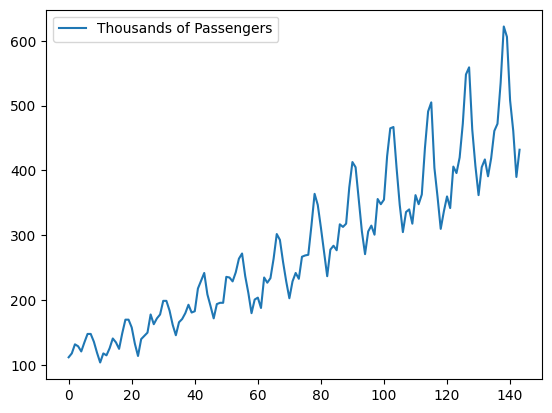

In [5]:
df.plot()

In [6]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df.drop(144,axis=0, inplace=True)
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [8]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [9]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [10]:
# initiating the model

model = Prophet()

In [11]:
model.fit(df)

12:05:21 - cmdstanpy - INFO - Chain [1] start processing
12:05:21 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# create future dates for next 365 days

future_dates =  model.make_future_dataframe(periods=365)

In [13]:
prediction = model.predict(future_dates)

In [14]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,55.721089,114.995332,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,49.275756,106.747740,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,83.020094,137.239787,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,80.097159,138.447425,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,82.174693,139.053511,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255


In [15]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [16]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


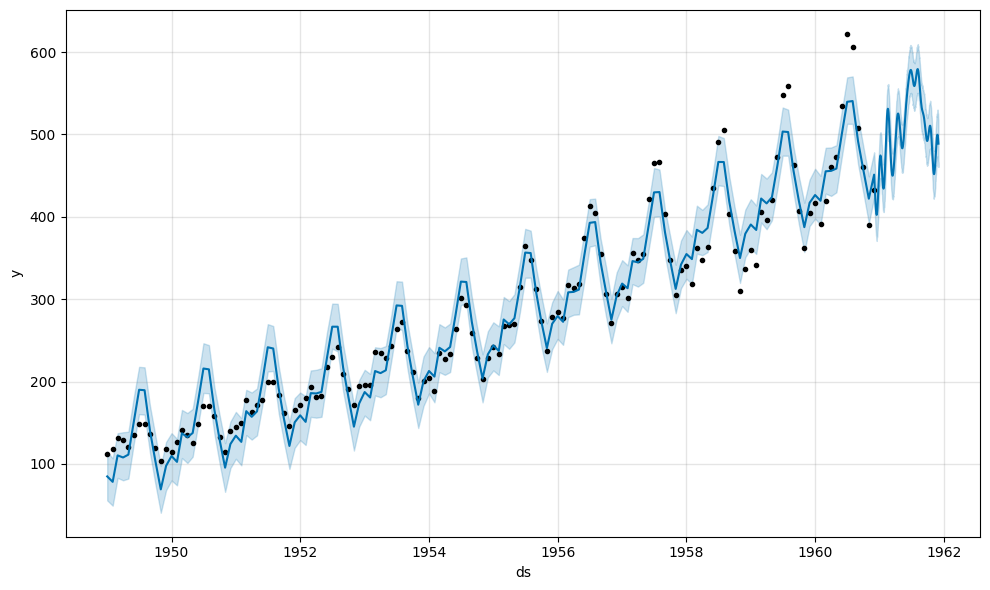

In [17]:
# plot the prediction

model.plot(prediction)
plt.show()

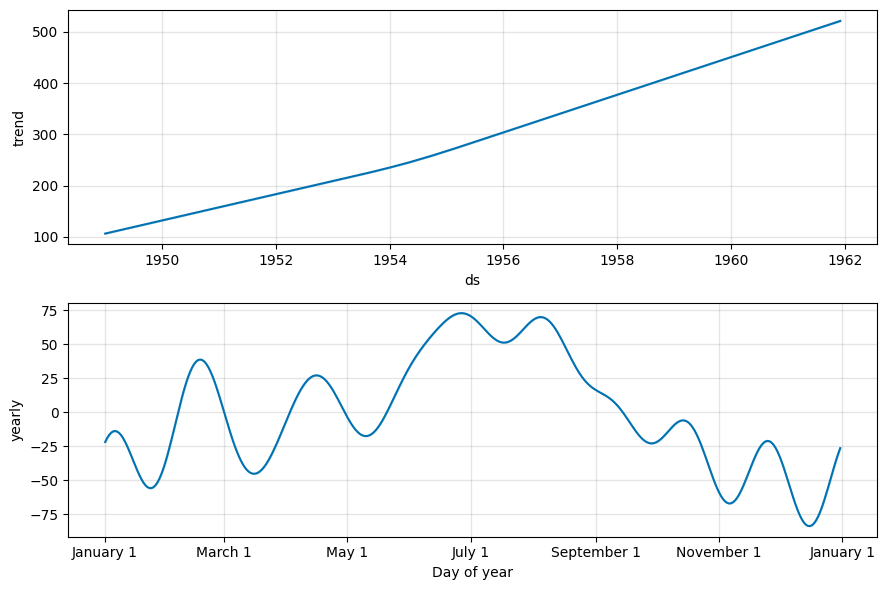

In [18]:
# visualize each components [Trends,Weekly]

model.plot_components(prediction)
plt.show()

In [19]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial = '730 days', period ='180 days',horizon = '365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]12:05:23 - cmdstanpy - INFO - Chain [1] start processing
12:06:02 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 1/19 [00:39<11:46, 39.26s/it]12:06:02 - cmdstanpy - INFO - Chain [1] start processing
12:06:03 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 2/19 [00:40<04:44, 16.73s/it]12:06:03 - cmdstanpy - INFO - Chain [1] start processing
12:06:04 - cmdstanpy - INFO - Chain [1] done processing
 16%|█▌        | 3/19 [00:40<02:31,  9.44s/it]12:06:04 - cmdstanpy - INFO - Chain [1] start processing
12:06:04 - cmdstanpy - INFO - Chain [1] done processing
 21%|██        | 4/19 [00:41<01:29,  5.96s/it]12:06:05 - cmdstanpy - INFO - Chain [1] start processing
12:06:05 - cmdstanpy - INFO - Chain [1] done processing
 26%|██▋       | 5/19 [00:42<00:55,  3.98s/it]12:06:05 - cmdstanpy - INFO - Chain [1] start processing
12:06:05 - cmdstanpy - INFO - Chain [1] done processing
 32%|███▏      | 6/19 [00:42<00:36,  2.79s/it]12:06:05

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.205061,156.984243,157.460942,150.0,1951-01-18
1,1951-03-01,169.726695,169.010650,170.517122,178.0,1951-01-18
2,1951-04-01,157.272915,155.767327,158.778321,163.0,1951-01-18
3,1951-05-01,143.304512,141.094756,145.722666,172.0,1951-01-18
4,1951-06-01,178.017955,174.883829,181.335496,178.0,1951-01-18


In [21]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1087.585276,32.978558,25.828241,0.078205,0.073741,0.079259,0.227273
1,42 days,1014.336159,31.848645,25.247395,0.076910,0.073741,0.077630,0.181818
2,46 days,909.313866,30.154832,24.670936,0.078810,0.079315,0.078584,0.136364
3,47 days,1044.683167,32.321559,26.845514,0.081984,0.085520,0.082145,0.136364
4,48 days,1034.252775,32.159801,26.300152,0.080102,0.085520,0.080328,0.181818
...,...,...,...,...,...,...,...,...
165,359 days,761.528786,27.595811,21.436170,0.067738,0.061561,0.067426,0.295455
166,360 days,765.072539,27.659945,21.721659,0.068615,0.061561,0.068321,0.272727
167,362 days,857.829952,29.288734,22.974151,0.067674,0.061561,0.067882,0.272727
168,364 days,831.539976,28.836435,21.907661,0.064765,0.049890,0.065070,0.318182


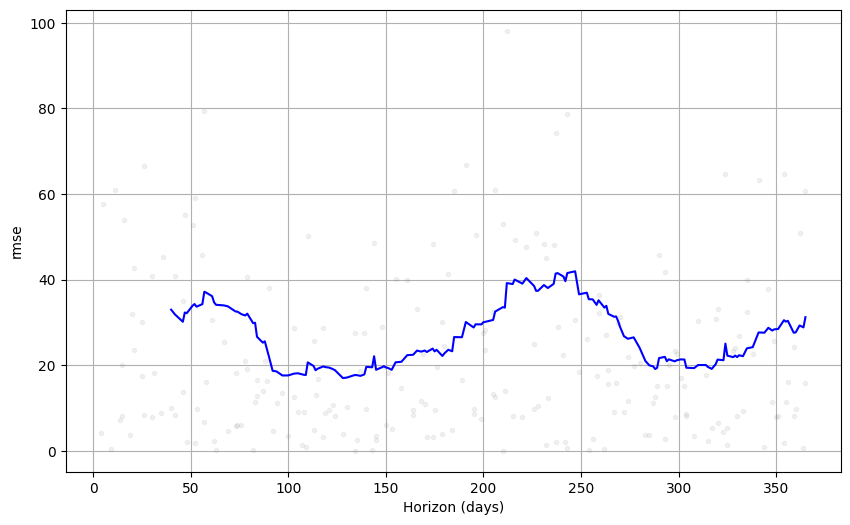

In [23]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv,metric = 'rmse')